# Data Cleaning and Merging

In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Import
1. Import from data output from Data Source notebooks
2. Format data in preparation for merge
    - ACS and BRFSS have different conventions for county names in the data. 
    - Example: ACS has Aleutians East Borough, BRFSS has Aleutians East (AK)
    - Need to remove suffix terminology from ACS data
    - ACS has "City" and "city" areas and BRFSS has "city", "City" areas or "". If "city" is dropped, then duplicates will emerge like St. Louis county vs St. Louis city in Missouri. 
    - "County" is explicitly named in "name" for ACS but omitted in BRFSS. ACS also contains, borough, census area, municipality, and parish
    - Since county and state name are the only index in common to merge the datasets, these will have to be cleaned for the best merge. 

In [2]:
a = pd.read_csv('acs5y_2021_pct_wCI.csv')
b = pd.read_csv('BRFSS.csv')

#Dropping Florida due to not not having data for 2021 BRFSS, and PR
a = a[a['name'].str.contains('Florida') == False]
a = a[a['name'].str.contains('Puerto Rico') == False]

In [3]:
a['county'] = a['name'].str.split(',').str[0]
a['county'] = a['county'].str.replace(' County', '', regex=False).str.strip()

a['state'] = a['name'].str.split(',').str[1]

b['county'] = b['locationname']
b['state'] = b['statedesc']

a.drop(['name'], axis=1, inplace=True)
b.drop(['locationname', 'statedesc','stateabbr'], axis=1, inplace=True)

a['state'] = a['state'].str.strip()
b['state'] = b['state'].str.strip()

a['county'] = a['county'].str.strip()
b['county'] = b['county'].str.strip()

display(a.head())
display(b.head())

,state,county,pop_tot,pop_25,pop_lf,pop_hc,hh_tot,hh_tot_int,hh_occu,pct_ed_lt9,pct_ed_9_12,pct_ed_hs,pct_ed_sc,pct_ed_asc,pct_ed_b,pct_ed_gr,pct_m_ed_lt9,pct_m_ed_9_12,pct_m_ed_hs,pct_m_ed_sc,pct_m_ed_asc,pct_m_ed_b,pct_m_ed_gr,pct_age_gte65,pct_m_age_gte65,pct_race_white,pct_race_black,pct_race_aian,pct_race_asian,pct_race_nhopi,pct_race_other,pct_m_race_white,pct_m_race_black,pct_m_race_aian,pct_m_race_asian,pct_m_race_nhopi,pct_m_race_other,pct_eth_hisp,pct_m_eth_hisp,pct_sex_male,pct_sex_female,pct_m_sex_male,pct_m_sex_female,pct_occ_unemp,pct_occ_mgt,pct_occ_svc,pct_occ_sales,pct_occ_nat_res,pct_occ_prod,pct_m_occ_unemp,pct_m_occ_mgt,pct_m_occ_svc,pct_m_occ_sales,pct_m_occ_nat_res,pct_m_occ_prod,pct_hlth_unins,pct_m_hlth_unins,pct_ses_pov,pct_m_ses_pov,pct_tp_veh_0,pct_tp_veh_1,pct_tp_veh_2,pct_tp_veh_3,pct_m_tp_veh_0,pct_m_tp_veh_1,pct_m_tp_veh_2,pct_m_tp_veh_3,pct_dg_bb_int,pct_m_dg_bb_int
0,Alabama,Autauga,58239,39614.0,25871,56955,21856.0,21856.0,21856,2.0,8.4,32.8,19.6,9.1,16.4,11.7,0.6,1.1,2.2,2.0,1.4,1.8,1.4,15.1,0.2,75.1,19.7,0.2,1.1,0.0,0.3,0.5,0.5,0.1,0.4,0.1,0.3,3.0,NaN,48.4,51.6,0.4,0.4,1.6,38.1,15.1,21.9,9.5,15.5,0.5,2.9,2.0,2.2,1.5,1.6,7.9,1.2,13.6,2.0,5.4,31.5,33.8,29.3,1.3,2.6,2.3,2.5,85.5,1.7
1,Alabama,Baldwin,227131,161977.0,104367,224339,87190.0,87190.0,87190,2.1,6.9,27.4,21.7,9.5,20.6,11.8,0.3,0.8,1.2,1.1,0.8,1.1,0.9,20.6,0.1,84.5,8.8,0.6,1.0,0.0,1.8,0.6,0.3,0.2,0.2,0.1,0.6,4.7,NaN,48.8,51.2,0.1,0.1,2.2,36.1,17.8,23.6,9.5,13.0,0.3,1.5,1.4,1.5,1.1,1.2,9.7,1.0,9.2,0.9,2.4,31.7,43.2,22.7,0.4,1.6,1.6,1.5,87.9,1.0
2,Alabama,Barbour,25259,17995.0,8561,22295,9088.0,9088.0,9088,7.4,16.9,36.7,20.5,7.3,6.7,4.4,1.1,1.8,2.8,1.8,1.1,1.1,1.0,19.0,0.1,45.5,47.4,0.3,0.4,0.0,3.9,0.8,0.7,0.2,0.2,0.1,0.8,4.7,NaN,52.9,47.1,0.3,0.3,3.9,25.6,20.7,19.9,12.2,21.6,0.9,3.7,3.4,2.9,2.6,3.0,10.4,1.5,26.5,2.7,11.2,33.3,33.8,21.7,2.2,3.2,2.9,2.4,64.6,3.5
3,Alabama,Bibb,22412,16057.0,8223,21000,7083.0,7083.0,7083,6.2,13.3,43.9,18.0,6.7,7.9,4.0,1.7,2.4,3.3,2.6,1.3,2.4,1.3,16.0,0.5,75.9,22.3,0.1,0.2,0.0,0.1,0.5,0.6,0.2,0.3,0.2,0.1,2.8,NaN,54.9,45.1,0.7,0.7,4.8,22.0,16.8,21.5,16.6,23.1,1.3,3.8,4.4,4.9,3.8,4.6,10.0,2.0,16.9,3.6,6.3,24.7,37.7,31.3,3.1,4.1,4.3,4.6,74.6,4.1
4,Alabama,Blount,58884,40668.0,24244,58437,21300.0,21300.0,21300,6.8,9.6,35.1,21.5,12.1,9.3,5.6,0.8,1.2,1.8,1.5,1.3,1.2,0.8,18.0,0.2,92.5,1.3,0.3,0.4,0.1,2.1,1.0,0.3,0.2,0.1,0.1,0.8,9.5,NaN,50.1,49.9,0.2,0.2,3.3,28.2,13.8,21.6,15.3,21.1,0.8,2.2,1.6,2.3,1.7,2.2,10.0,1.3,13.2,1.7,4.5,25.0,32.1,38.4,1.2,2.4,2.3,2.6,81.0,1.9


,totalpopulation,m_ACCESS2_AgeAdjPrv,m_ACCESS2_CrdPrv,m_CHECKUP_AgeAdjPrv,m_CHECKUP_CrdPrv,m_CSMOKING_AgeAdjPrv,m_CSMOKING_CrdPrv,m_DEPRESSION_AgeAdjPrv,m_DEPRESSION_CrdPrv,m_DIABETES_AgeAdjPrv,m_DIABETES_CrdPrv,m_GHLTH_AgeAdjPrv,m_GHLTH_CrdPrv,m_MHLTH_AgeAdjPrv,m_MHLTH_CrdPrv,m_OBESITY_AgeAdjPrv,m_OBESITY_CrdPrv,m_ACCESS2_AgeAdjPrv_low,m_ACCESS2_AgeAdjPrv_high,m_ACCESS2_CrdPrv_low,m_ACCESS2_CrdPrv_high,m_CHECKUP_AgeAdjPrv_low,m_CHECKUP_AgeAdjPrv_high,m_CHECKUP_CrdPrv_low,m_CHECKUP_CrdPrv_high,m_CSMOKING_AgeAdjPrv_low,m_CSMOKING_AgeAdjPrv_high,m_CSMOKING_CrdPrv_low,m_CSMOKING_CrdPrv_high,m_DEPRESSION_AgeAdjPrv_low,m_DEPRESSION_AgeAdjPrv_high,m_DEPRESSION_CrdPrv_low,m_DEPRESSION_CrdPrv_high,m_DIABETES_AgeAdjPrv_low,m_DIABETES_AgeAdjPrv_high,m_DIABETES_CrdPrv_low,m_DIABETES_CrdPrv_high,m_GHLTH_AgeAdjPrv_low,m_GHLTH_AgeAdjPrv_high,m_GHLTH_CrdPrv_low,m_GHLTH_CrdPrv_high,m_MHLTH_AgeAdjPrv_low,m_MHLTH_AgeAdjPrv_high,m_MHLTH_CrdPrv_low,m_MHLTH_CrdPrv_high,m_OBESITY_AgeAdjPrv_low,m_OBESITY_AgeAdjPrv_high,m_OBESITY_CrdPrv_low,m_OBESITY_CrdPrv_high,county,state
0,3398,16.9,16.5,60.7,60.7,18.6,19.3,13.1,13.0,12.6,13.1,19.1,19.2,12.9,12.7,31.3,32.1,13.8,20.3,13.4,19.6,54.6,66.8,54.5,66.8,15.6,22.3,16.1,23.1,10.6,15.9,10.5,15.8,10.8,14.6,11.3,15.1,16.6,22.0,16.8,22.2,11.2,14.9,11.0,14.7,24.5,38.7,25.2,39.5,Aleutians East,Alaska
1,5059,13.7,13.4,61.6,60.6,15.5,16.7,13.4,13.5,10.9,10.8,15.3,15.0,12.2,12.2,30.3,31.6,11.5,16.2,11.2,15.9,56.2,67.9,55.1,67.1,13.0,18.5,14.0,19.9,11.1,16.5,11.2,16.5,9.4,12.6,9.3,12.6,13.3,17.4,13.0,17.2,10.7,14.1,10.7,14.0,24.8,37.6,25.9,39.0,Aleutians West,Alaska
2,288121,10.4,10.3,62.9,62.7,14.9,15.0,19.5,19.7,7.8,7.9,13.5,13.5,14.5,14.6,32.9,33.0,8.5,12.7,8.5,12.6,58.9,66.6,58.7,66.4,12.3,17.7,12.4,17.7,17.1,22.1,17.3,22.4,6.8,8.9,6.9,9.0,11.7,15.6,11.7,15.5,12.8,16.3,12.9,16.4,29.0,37.0,29.1,37.1,Anchorage,Alaska
3,18557,19.2,19.1,62.6,61.2,35.4,35.5,21.2,21.9,15.9,14.8,30.0,29.0,21.4,22.4,43.1,42.8,15.2,23.4,15.0,23.5,57.1,67.6,55.7,66.4,29.9,40.7,29.7,40.7,17.7,25.1,18.3,26.0,13.8,18.1,12.7,16.8,26.1,34.2,25.0,33.1,18.6,24.2,19.4,25.3,36.3,49.7,35.9,49.4,Bethel,Alaska
4,838,10.3,9.8,61.4,64.2,18.7,18.8,18.8,18.1,8.6,10.7,14.4,15.9,15.4,14.4,35.6,36.4,8.4,12.4,8.1,11.8,55.4,66.9,58.4,69.5,15.3,22.1,15.5,22.3,15.5,22.6,14.9,21.8,7.3,10.1,9.1,12.6,12.4,16.6,13.7,18.3,13.4,17.6,12.5,16.5,28.5,42.9,29.3,43.9,Bristol Bay,Alaska


In [4]:
_a = a.copy()
_b = b.copy()

#independent cities have case sensitive names
independent_cities_a=[
            'Baltimore city', 'St. Louis city','Carson City','Charles City',
            'Fairfax city', 'Franklin city', 'James City','Richmond city', 'Roanoke city'
]
independent_cities_b=[
            'Baltimore City', 'St. Louis City','Carson City','Charles City',
            'Fairfax City', 'Franklin City', 'James City','Richmond City', 'Roanoke City'
]

#for independent cities matches in county columns for both datasets, replace City with Cty
_a['county'] = _a.apply(lambda row: row['county'].replace(' City', ' Cty') if row['county'] in independent_cities_a else row['county'], axis=1)
_a['county'] = _a.apply(lambda row: row['county'].replace(' city', ' Cty') if row['county'] in independent_cities_a else row['county'], axis=1)
_b['county'] = _b.apply(lambda row: row['county'].replace(' City', ' Cty') if row['county'] in independent_cities_b else row['county'], axis=1)

#Parish for Louisiana and city for city-counties
_a['county'] = _a.apply(lambda row: row['county'].replace(' Parish', '') if row['state'] == 'Louisiana' else row['county'], axis=1)
_a['county'] = _a['county'].str.replace(' city', '', regex=False)

#Alaska
_a['county'] = _a.apply(lambda row: row['county'].replace(' Census Area', '') if row['state'] == 'Alaska' else row['county'], axis=1)
_a['county'] = _a.apply(lambda row: row['county'].replace(' City and Borough', '') if row['state'] == 'Alaska' else row['county'], axis=1)
_a['county'] = _a.apply(lambda row: row['county'].replace(' Borough', '') if row['state'] == 'Alaska' else row['county'], axis=1)
_a['county'] = _a.apply(lambda row: row['county'].replace(' Municipality', '') if row['state'] == 'Alaska' else row['county'], axis=1)


#non standard character in New Mexico
_b['county'] = _b['county'].replace('DoÃ±a Ana', 'Doña Ana')
_a['county'] = _a['county'].replace('DoÃ±a Ana', 'Doña Ana')

#merge by county and state
merged = pd.merge(_b, _a, on=['county', 'state'], how='left')
display(_a.shape)
display(_b.shape)
display(merged.shape)

(3076, 69)

(3076, 51)

(3076, 118)

In [5]:
#check for duplicates, null, and nan values
display(merged.isnull().sum())
display(merged.isna().sum())
display(merged.duplicated().sum())

totalpopulation                   0
m_ACCESS2_AgeAdjPrv               0
m_ACCESS2_CrdPrv                  0
m_CHECKUP_AgeAdjPrv               0
m_CHECKUP_CrdPrv                  0
m_CSMOKING_AgeAdjPrv              0
m_CSMOKING_CrdPrv                 0
m_DEPRESSION_AgeAdjPrv            0
m_DEPRESSION_CrdPrv               0
m_DIABETES_AgeAdjPrv              0
m_DIABETES_CrdPrv                 0
m_GHLTH_AgeAdjPrv                 0
m_GHLTH_CrdPrv                    0
m_MHLTH_AgeAdjPrv                 0
m_MHLTH_CrdPrv                    0
m_OBESITY_AgeAdjPrv               0
m_OBESITY_CrdPrv                  0
m_ACCESS2_AgeAdjPrv_low           0
m_ACCESS2_AgeAdjPrv_high          0
m_ACCESS2_CrdPrv_low              0
m_ACCESS2_CrdPrv_high             0
m_CHECKUP_AgeAdjPrv_low           0
m_CHECKUP_AgeAdjPrv_high          0
m_CHECKUP_CrdPrv_low              0
m_CHECKUP_CrdPrv_high             0
m_CSMOKING_AgeAdjPrv_low          0
m_CSMOKING_AgeAdjPrv_high         0
m_CSMOKING_CrdPrv_low       

totalpopulation                   0
m_ACCESS2_AgeAdjPrv               0
m_ACCESS2_CrdPrv                  0
m_CHECKUP_AgeAdjPrv               0
m_CHECKUP_CrdPrv                  0
m_CSMOKING_AgeAdjPrv              0
m_CSMOKING_CrdPrv                 0
m_DEPRESSION_AgeAdjPrv            0
m_DEPRESSION_CrdPrv               0
m_DIABETES_AgeAdjPrv              0
m_DIABETES_CrdPrv                 0
m_GHLTH_AgeAdjPrv                 0
m_GHLTH_CrdPrv                    0
m_MHLTH_AgeAdjPrv                 0
m_MHLTH_CrdPrv                    0
m_OBESITY_AgeAdjPrv               0
m_OBESITY_CrdPrv                  0
m_ACCESS2_AgeAdjPrv_low           0
m_ACCESS2_AgeAdjPrv_high          0
m_ACCESS2_CrdPrv_low              0
m_ACCESS2_CrdPrv_high             0
m_CHECKUP_AgeAdjPrv_low           0
m_CHECKUP_AgeAdjPrv_high          0
m_CHECKUP_CrdPrv_low              0
m_CHECKUP_CrdPrv_high             0
m_CSMOKING_AgeAdjPrv_low          0
m_CSMOKING_AgeAdjPrv_high         0
m_CSMOKING_CrdPrv_low       

0

In [6]:
merged.head(10)

,totalpopulation,m_ACCESS2_AgeAdjPrv,m_ACCESS2_CrdPrv,m_CHECKUP_AgeAdjPrv,m_CHECKUP_CrdPrv,m_CSMOKING_AgeAdjPrv,m_CSMOKING_CrdPrv,m_DEPRESSION_AgeAdjPrv,m_DEPRESSION_CrdPrv,m_DIABETES_AgeAdjPrv,m_DIABETES_CrdPrv,m_GHLTH_AgeAdjPrv,m_GHLTH_CrdPrv,m_MHLTH_AgeAdjPrv,m_MHLTH_CrdPrv,m_OBESITY_AgeAdjPrv,m_OBESITY_CrdPrv,m_ACCESS2_AgeAdjPrv_low,m_ACCESS2_AgeAdjPrv_high,m_ACCESS2_CrdPrv_low,m_ACCESS2_CrdPrv_high,m_CHECKUP_AgeAdjPrv_low,m_CHECKUP_AgeAdjPrv_high,m_CHECKUP_CrdPrv_low,m_CHECKUP_CrdPrv_high,m_CSMOKING_AgeAdjPrv_low,m_CSMOKING_AgeAdjPrv_high,m_CSMOKING_CrdPrv_low,m_CSMOKING_CrdPrv_high,m_DEPRESSION_AgeAdjPrv_low,m_DEPRESSION_AgeAdjPrv_high,m_DEPRESSION_CrdPrv_low,m_DEPRESSION_CrdPrv_high,m_DIABETES_AgeAdjPrv_low,m_DIABETES_AgeAdjPrv_high,m_DIABETES_CrdPrv_low,m_DIABETES_CrdPrv_high,m_GHLTH_AgeAdjPrv_low,m_GHLTH_AgeAdjPrv_high,m_GHLTH_CrdPrv_low,m_GHLTH_CrdPrv_high,m_MHLTH_AgeAdjPrv_low,m_MHLTH_AgeAdjPrv_high,m_MHLTH_CrdPrv_low,m_MHLTH_CrdPrv_high,m_OBESITY_AgeAdjPrv_low,m_OBESITY_AgeAdjPrv_high,m_OBESITY_CrdPrv_low,m_OBESITY_CrdPrv_high,county,state,pop_tot,pop_25,pop_lf,pop_hc,hh_tot,hh_tot_int,hh_occu,pct_ed_lt9,pct_ed_9_12,pct_ed_hs,pct_ed_sc,pct_ed_asc,pct_ed_b,pct_ed_gr,pct_m_ed_lt9,pct_m_ed_9_12,pct_m_ed_hs,pct_m_ed_sc,pct_m_ed_asc,pct_m_ed_b,pct_m_ed_gr,pct_age_gte65,pct_m_age_gte65,pct_race_white,pct_race_black,pct_race_aian,pct_race_asian,pct_race_nhopi,pct_race_other,pct_m_race_white,pct_m_race_black,pct_m_race_aian,pct_m_race_asian,pct_m_race_nhopi,pct_m_race_other,pct_eth_hisp,pct_m_eth_hisp,pct_sex_male,pct_sex_female,pct_m_sex_male,pct_m_sex_female,pct_occ_unemp,pct_occ_mgt,pct_occ_svc,pct_occ_sales,pct_occ_nat_res,pct_occ_prod,pct_m_occ_unemp,pct_m_occ_mgt,pct_m_occ_svc,pct_m_occ_sales,pct_m_occ_nat_res,pct_m_occ_prod,pct_hlth_unins,pct_m_hlth_unins,pct_ses_pov,pct_m_ses_pov,pct_tp_veh_0,pct_tp_veh_1,pct_tp_veh_2,pct_tp_veh_3,pct_m_tp_veh_0,pct_m_tp_veh_1,pct_m_tp_veh_2,pct_m_tp_veh_3,pct_dg_bb_int,pct_m_dg_bb_int
0,3398,16.9,16.5,60.7,60.7,18.6,19.3,13.1,13.0,12.6,13.1,19.1,19.2,12.9,12.7,31.3,32.1,13.8,20.3,13.4,19.6,54.6,66.8,54.5,66.8,15.6,22.3,16.1,23.1,10.6,15.9,10.5,15.8,10.8,14.6,11.3,15.1,16.6,22.0,16.8,22.2,11.2,14.9,11.0,14.7,24.5,38.7,25.2,39.5,Aleutians East,Alaska,3409,2598.0,2213,3404,914.0,914.0,914,6.1,9.2,41.6,21.9,5.4,10.6,5.4,1.6,2.0,3.9,2.6,1.8,2.4,1.9,11.7,1.9,14.6,2.1,44.1,20.9,0.3,6.5,3.0,1.4,5.8,4.0,0.3,2.5,10.5,3.1,59.1,40.9,3.0,3.0,3.5,23.9,13.2,11.7,12.7,38.6,1.2,3.6,2.7,2.3,2.8,6.8,40.0,3.4,13.4,2.6,24.0,37.2,28.0,10.8,4.0,4.5,3.6,2.2,57.5,4.0
1,5059,13.7,13.4,61.6,60.6,15.5,16.7,13.4,13.5,10.9,10.8,15.3,15.0,12.2,12.2,30.3,31.6,11.5,16.2,11.2,15.9,56.2,67.9,55.1,67.1,13.0,18.5,14.0,19.9,11.1,16.5,11.2,16.5,9.4,12.6,9.3,12.6,13.3,17.4,13.0,17.2,10.7,14.1,10.7,14.0,24.8,37.6,25.9,39.0,Aleutians West,Alaska,5251,3838.0,3655,4990,1004.0,1004.0,1004,4.8,4.1,43.4,25.1,5.8,14.4,2.4,1.7,1.2,4.9,2.9,1.9,3.4,1.1,7.0,1.5,24.5,3.5,10.5,45.8,1.7,5.5,0.7,2.4,1.3,3.8,0.9,1.7,9.7,2.4,57.0,43.0,3.2,3.2,3.1,16.1,15.5,23.3,10.9,34.1,1.4,3.0,3.2,4.5,3.0,5.5,19.6,3.6,8.3,3.2,14.2,39.8,35.5,10.5,2.9,5.0,6.2,2.7,77.0,4.6
2,288121,10.4,10.3,62.9,62.7,14.9,15.0,19.5,19.7,7.8,7.9,13.5,13.5,14.5,14.6,32.9,33.0,8.5,12.7,8.5,12.6,58.9,66.6,58.7,66.4,12.3,17.7,12.4,17.7,17.1,22.1,17.3,22.4,6.8,8.9,6.9,9.0,11.7,15.6,11.7,15.5,12.8,16.3,12.9,16.4,29.0,37.0,29.1,37.1,Anchorage,Alaska,292545,193312.0,144598,280684,106695.0,106695.0,106695,2.2,3.7,23.7,25.0,8.6,22.8,14.0,0.4,0.4,0.9,0.9,0.5,0.8,0.7,11.5,0.1,60.3,5.4,7.2,9.7,2.9,2.7,0.5,0.2,0.5,0.3,0.1,0.4,9.5,NaN,51.2,48.8,0.1,0.1,3.6,41.6,18.0,21.0,8.3,11.1,0.4,1.0,0.9,0.9,0.7,0.6,10.5,0.8,9.1,0.8,5.5,32.9,39.8,21.8,0.6,1.2,1.1,1.1,92.7,0.7
3,18557,19.2,19.1,62.6,61.2,35.4,35.5,21.2,21.9,15.9,14.8,30.0,29.0,21.4,22.4,43.1,42.8,15.2,23.4,15.0,23.5,57.1,67.6,55.7,66.4,29.9,40.7,29.7,40.7,17.7,25.1,18.3,26.0,13.8,18.1,12.7,16.8,26.1,34.2,25.0,33.1,18.6,24.2,19.4,25.3,36.3,49.7,35.9,49.4,Bethel,Alaska,18514,10025.0,6454,18270,4520.0,4520.0,4520,6.9,11.2,46.6,18.1,4.5,

# Validation
- Total Population in common between both datasets, plot variance to check for outliers


In [7]:
val = merged.copy()

In [8]:
val['variance_pop'] = val['totalpopulation'] - val['pop_tot']

<Axes: title={'center': 'Variance of Population'}, ylabel='Frequency'>

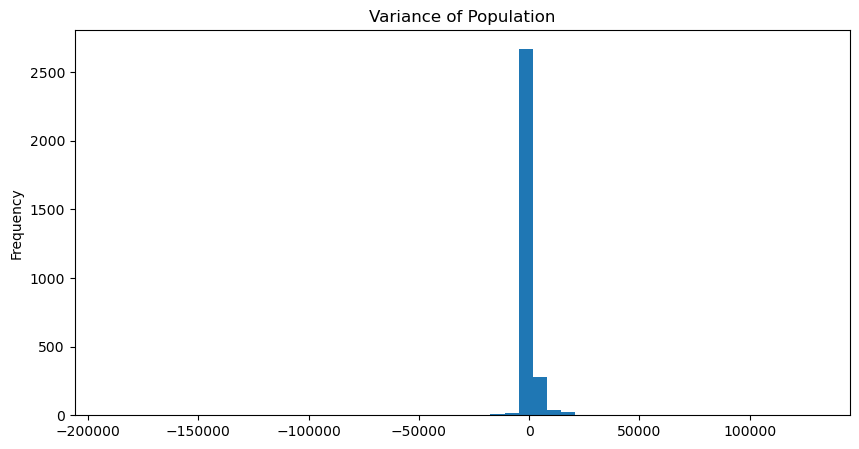

In [9]:
#plot variance pop
val['variance_pop'].plot(kind='hist', bins=50, figsize=(10,5), title='Variance of Population')

In [10]:
val = val[['variance_pop','county','state']].copy()

#display extreme values by row
display(val.sort_values(by=['variance_pop'], ascending=True).head(10))
display(val.sort_values(by=['variance_pop'], ascending=False).head(10))

val.describe()

,variance_pop,county,state
205,-190091,Los Angeles,California
643,-92252,Cook,Illinois
1945,-92251,New York,New York
1938,-71308,Kings,New York
1955,-61961,Queens,New York
224,-50732,San Francisco,California
229,-46514,Santa Clara,California
1917,-43314,Bronx,New York
227,-24600,San Mateo,California
187,-24577,Alameda,California


,variance_pop,county,state
179,129402,Maricopa,Arizona
2499,69650,Collin,Texas
1900,61329,Clark,Nevada
2518,56635,Denton,Texas
2535,52030,Fort Bend,Texas
2702,51267,Williamson,Texas
219,49064,Riverside,California
2626,40887,Montgomery,Texas
2471,37714,Bexar,Texas
2683,37359,Travis,Texas


,variance_pop
count,3076.000000
mean,561.410273
std,6723.107574
min,-190091.000000
25%,-174.000000
50%,7.500000
75%,427.000000
max,129402.000000


In [11]:
#export to csv
merged.to_csv('acs5y_2021_brfss_2021_merged.csv', index=False, header=True)

In [12]:
acs_brfss = pd.read_csv('acs5y_2021_brfss_2021_merged.csv')
bb_int = pd.read_csv('broadband_structural_jun_22.csv')

#lowercase columns bb_int
bb_int.columns = bb_int.columns.str.lower()

In [13]:
state = {
        'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
        'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'DC': 'District of Columbia',
        'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois',
        'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana',
        'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota',
        'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
        'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
        'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
        'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
        'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
        'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin',
        'WY': 'Wyoming'
}

bb_int['state'] = bb_int['state'].map(state)

bb_int.head()

,t1_2_3_4_5_6_7_8_s3_r,state,county
0,1.0,Alabama,Autauga County
1,1.0,Alabama,Baldwin County
2,1.0,Alabama,Barbour County
3,1.0,Alabama,Bibb County
4,1.0,Alabama,Blount County


In [14]:
#rename t1_2_3_7_s3_r to bb_int_struct
bb_int.rename(columns={'t1_2_3_4_5_6_7_8_s3_r':'bb_int_struct'}, inplace=True)


In [15]:
bb_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3234 entries, 0 to 3233
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bb_int_struct  3234 non-null   float64
 1   state          3143 non-null   object 
 2   county         3234 non-null   object 
dtypes: float64(1), object(2)
memory usage: 75.9+ KB


In [16]:
#drop null and Florida due to not having data for 2021 BRFSS
bb_int.dropna(inplace=True)
bb_int = bb_int[bb_int['state'].str.contains('Florida') == False]
bb_int = bb_int[bb_int['state'].str.contains('Puerto Rico') == False]
bb_int.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3076 entries, 0 to 3142
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bb_int_struct  3076 non-null   float64
 1   state          3076 non-null   object 
 2   county         3076 non-null   object 
dtypes: float64(1), object(2)
memory usage: 96.1+ KB


In [17]:
_c = bb_int.copy()

#independent cities have case sensitive names
independent_cities_c=[
            'Baltimore city', 'St. Louis city','Carson City','Charles City',
            'Fairfax city', 'Franklin city', 'James City','Richmond city', 'Roanoke city'
]

#drop county from county column
_c['county'] = _c['county'].str.split(' County').str[0]

# replace City with Cty to assist with merge
_c['county'] = _c.apply(lambda row: row['county'].replace(' city', ' Cty') if row['county'] in independent_cities_c else row['county'], axis=1)
_c['county'] = _c.apply(lambda row: row['county'].replace(' City', ' Cty') if row['county'] in independent_cities_c else row['county'], axis=1)

#Parish for Louisiana and city for city-counties
_c['county'] = _c.apply(lambda row: row['county'].replace(' Parish', '') if row['state'] == 'Louisiana' else row['county'], axis=1)
_c['county'] = _c['county'].str.replace(' city', '', regex=False)

#Alaska
_c['county'] = _c.apply(lambda row: row['county'].replace(' Census Area', '') if row['state'] == 'Alaska' else row['county'], axis=1)
_c['county'] = _c.apply(lambda row: row['county'].replace(' City and Borough', '') if row['state'] == 'Alaska' else row['county'], axis=1)
_c['county'] = _c.apply(lambda row: row['county'].replace(' Borough', '') if row['state'] == 'Alaska' else row['county'], axis=1)
_c['county'] = _c.apply(lambda row: row['county'].replace(' Municipality', '') if row['state'] == 'Alaska' else row['county'], axis=1)

#merge by county and state
merged = pd.merge(acs_brfss, _c, on=['county', 'state'], how='left')
display(acs_brfss.shape)
display(_c.shape)
display(merged.shape)
#print non matches
display(merged[merged['bb_int_struct'].isnull()])
merged_original = merged.copy()


(3076, 118)

(3076, 3)

(3076, 119)

,totalpopulation,m_ACCESS2_AgeAdjPrv,m_ACCESS2_CrdPrv,m_CHECKUP_AgeAdjPrv,m_CHECKUP_CrdPrv,m_CSMOKING_AgeAdjPrv,m_CSMOKING_CrdPrv,m_DEPRESSION_AgeAdjPrv,m_DEPRESSION_CrdPrv,m_DIABETES_AgeAdjPrv,m_DIABETES_CrdPrv,m_GHLTH_AgeAdjPrv,m_GHLTH_CrdPrv,m_MHLTH_AgeAdjPrv,m_MHLTH_CrdPrv,m_OBESITY_AgeAdjPrv,m_OBESITY_CrdPrv,m_ACCESS2_AgeAdjPrv_low,m_ACCESS2_AgeAdjPrv_high,m_ACCESS2_CrdPrv_low,m_ACCESS2_CrdPrv_high,m_CHECKUP_AgeAdjPrv_low,m_CHECKUP_AgeAdjPrv_high,m_CHECKUP_CrdPrv_low,m_CHECKUP_CrdPrv_high,m_CSMOKING_AgeAdjPrv_low,m_CSMOKING_AgeAdjPrv_high,m_CSMOKING_CrdPrv_low,m_CSMOKING_CrdPrv_high,m_DEPRESSION_AgeAdjPrv_low,m_DEPRESSION_AgeAdjPrv_high,m_DEPRESSION_CrdPrv_low,m_DEPRESSION_CrdPrv_high,m_DIABETES_AgeAdjPrv_low,m_DIABETES_AgeAdjPrv_high,m_DIABETES_CrdPrv_low,m_DIABETES_CrdPrv_high,m_GHLTH_AgeAdjPrv_low,m_GHLTH_AgeAdjPrv_high,m_GHLTH_CrdPrv_low,m_GHLTH_CrdPrv_high,m_MHLTH_AgeAdjPrv_low,m_MHLTH_AgeAdjPrv_high,m_MHLTH_CrdPrv_low,m_MHLTH_CrdPrv_high,m_OBESITY_AgeAdjPrv_low,m_OBESITY_AgeAdjPrv_high,m_OBESITY_CrdPrv_low,m_OBESITY_CrdPrv_high,county,state,pop_tot,pop_25,pop_lf,pop_hc,hh_tot,hh_tot_int,hh_occu,pct_ed_lt9,pct_ed_9_12,pct_ed_hs,pct_ed_sc,pct_ed_asc,pct_ed_b,pct_ed_gr,pct_m_ed_lt9,pct_m_ed_9_12,pct_m_ed_hs,pct_m_ed_sc,pct_m_ed_asc,pct_m_ed_b,pct_m_ed_gr,pct_age_gte65,pct_m_age_gte65,pct_race_white,pct_race_black,pct_race_aian,pct_race_asian,pct_race_nhopi,pct_race_other,pct_m_race_white,pct_m_race_black,pct_m_race_aian,pct_m_race_asian,pct_m_race_nhopi,pct_m_race_other,pct_eth_hisp,pct_m_eth_hisp,pct_sex_male,pct_sex_female,pct_m_sex_male,pct_m_sex_female,pct_occ_unemp,pct_occ_mgt,pct_occ_svc,pct_occ_sales,pct_occ_nat_res,pct_occ_prod,pct_m_occ_unemp,pct_m_occ_mgt,pct_m_occ_svc,pct_m_occ_sales,pct_m_occ_nat_res,pct_m_occ_prod,pct_hlth_unins,pct_m_hlth_unins,pct_ses_pov,pct_m_ses_pov,pct_tp_veh_0,pct_tp_veh_1,pct_tp_veh_2,pct_tp_veh_3,pct_m_tp_veh_0,pct_m_tp_veh_1,pct_m_tp_veh_2,pct_m_tp_veh_3,pct_dg_bb_int,pct_m_dg_bb_int,bb_int_struct


In [18]:
#check for duplicates, null, and nan values
display(merged.isnull().sum())


totalpopulation                   0
m_ACCESS2_AgeAdjPrv               0
m_ACCESS2_CrdPrv                  0
m_CHECKUP_AgeAdjPrv               0
m_CHECKUP_CrdPrv                  0
m_CSMOKING_AgeAdjPrv              0
m_CSMOKING_CrdPrv                 0
m_DEPRESSION_AgeAdjPrv            0
m_DEPRESSION_CrdPrv               0
m_DIABETES_AgeAdjPrv              0
m_DIABETES_CrdPrv                 0
m_GHLTH_AgeAdjPrv                 0
m_GHLTH_CrdPrv                    0
m_MHLTH_AgeAdjPrv                 0
m_MHLTH_CrdPrv                    0
m_OBESITY_AgeAdjPrv               0
m_OBESITY_CrdPrv                  0
m_ACCESS2_AgeAdjPrv_low           0
m_ACCESS2_AgeAdjPrv_high          0
m_ACCESS2_CrdPrv_low              0
m_ACCESS2_CrdPrv_high             0
m_CHECKUP_AgeAdjPrv_low           0
m_CHECKUP_AgeAdjPrv_high          0
m_CHECKUP_CrdPrv_low              0
m_CHECKUP_CrdPrv_high             0
m_CSMOKING_AgeAdjPrv_low          0
m_CSMOKING_AgeAdjPrv_high         0
m_CSMOKING_CrdPrv_low       

In [19]:
#RUCA codes
d = pd.read_csv('ruca_codes.csv')
d.head()

,Select State,Select County,Primary RUCA Code 2010
0,AK,Aleutians East Borough,10
1,AK,Aleutians West Census Area,10
2,AK,Anchorage Municipality,1
3,AK,Bethel Census Area,9
4,AK,Bristol Bay Borough,10


In [20]:
#rename 
d.rename(columns={'Select State':'state', 'Select County':'county', 'Primary RUCA Code 2010' : 'RUCA'}, inplace=True)

#remap state
d['state'] = d['state'].map(state)

In [21]:
#drop null and Florida due to not having data for 2021 BRFSS
d = d[d['state'].str.contains('Florida') == False]
d = d[d['state'].str.contains('Puerto Rico') == False]

In [22]:
d.head()
print(d.shape)

(3076, 3)


In [23]:
#independent cities have case sensitive names
independent_cities_d=[
            'Baltimore city', 'St. Louis city','Carson City','Charles City',
            'Fairfax city', 'Franklin city', 'James City','Richmond city', 'Roanoke city'
]

#drop county from county column
d['county'] = d['county'].str.split(' County').str[0]

#for independent cities matches in county columns for both datasets, replace City or city with Cty
d['county'] = d.apply(lambda row: row['county'].replace(' city', ' Cty') if row['county'] in independent_cities_d else row['county'], axis=1)
d['county'] = d.apply(lambda row: row['county'].replace(' City', ' Cty') if row['county'] in independent_cities_d else row['county'], axis=1)

#Parish for Louisiana and city for city-counties
d['county'] = d.apply(lambda row: row['county'].replace(' Parish', '') if row['state'] == 'Louisiana' else row['county'], axis=1)
d['county'] = d['county'].str.replace(' city', '', regex=False)

#Alaska
d['county'] = d.apply(lambda row: row['county'].replace(' Census Area', '') if row['state'] == 'Alaska' else row['county'], axis=1)
d['county'] = d.apply(lambda row: row['county'].replace(' City and Borough', '') if row['state'] == 'Alaska' else row['county'], axis=1)
d['county'] = d.apply(lambda row: row['county'].replace(' Borough', '') if row['state'] == 'Alaska' else row['county'], axis=1)
d['county'] = d.apply(lambda row: row['county'].replace(' Municipality', '') if row['state'] == 'Alaska' else row['county'], axis=1)

#remove space in La Salle, Louisiana
d['county'] = d.apply(lambda row: row['county'].replace('La Salle', 'LaSalle') if row['state'] == 'Louisiana' else row['county'], axis=1)
#rename Shannon County to Oglala Lakota County (2015 name change)
d['county'] = d.apply(lambda row: row['county'].replace('Shannon', 'Oglala Lakota') if row['state'] == 'South Dakota' else row['county'], axis=1)

#merge by county and state
merged = pd.merge(merged, d, on=['county', 'state'], how='left')
display(acs_brfss.shape)
display(_c.shape)
display(merged.shape)

(3076, 118)

(3076, 3)

(3077, 120)

In [24]:
# Count the occurrences of each key in both DataFrames
key_counts_merged = merged_original.groupby(['county', 'state']).size()
key_counts_d = d.groupby(['county', 'state']).size()

# Merge these counts to see where there are discrepancies
counts_merged = key_counts_merged.reset_index(name='count_merged')
counts_d = key_counts_d.reset_index(name='count_d')
comparison = pd.merge(counts_merged, counts_d, on=['county', 'state'], how='outer')

# Find where the counts don't match
mismatched_counts = comparison[comparison['count_merged'] != comparison['count_d']]

In [25]:
keys_merged = set(zip(merged_original['county'], merged_original['state']))
keys_d = set(zip(d['county'], d['state']))
unmatched_keys = keys_d - keys_merged
unmatched_rows = d[d.set_index(['county', 'state']).index.isin(unmatched_keys)]

# Display the unmatched rows
display(unmatched_rows)
display(mismatched_counts)

,state,county,RUCA
24,Alaska,Valdez-Cordova,10
25,Alaska,Wade Hampton,10


,county,state,count_merged,count_d
164,Bedford,Virginia,1.0,2.0
500,Chugach,Alaska,1.0,NaN
625,Copper River,Alaska,1.0,NaN
1507,Kusilvak,Alaska,1.0,NaN
3076,Valdez-Cordova,Alaska,NaN,1.0
3077,Wade Hampton,Alaska,NaN,1.0


In [26]:
#drop line 164 due to duplicate 
merged.drop(merged.index[164], inplace=True)

In [27]:
#check for duplicates, null, and nan values
display(merged.isnull().sum())
display(merged.isna().sum())
display(merged.duplicated().sum())

totalpopulation                   0
m_ACCESS2_AgeAdjPrv               0
m_ACCESS2_CrdPrv                  0
m_CHECKUP_AgeAdjPrv               0
m_CHECKUP_CrdPrv                  0
m_CSMOKING_AgeAdjPrv              0
m_CSMOKING_CrdPrv                 0
m_DEPRESSION_AgeAdjPrv            0
m_DEPRESSION_CrdPrv               0
m_DIABETES_AgeAdjPrv              0
m_DIABETES_CrdPrv                 0
m_GHLTH_AgeAdjPrv                 0
m_GHLTH_CrdPrv                    0
m_MHLTH_AgeAdjPrv                 0
m_MHLTH_CrdPrv                    0
m_OBESITY_AgeAdjPrv               0
m_OBESITY_CrdPrv                  0
m_ACCESS2_AgeAdjPrv_low           0
m_ACCESS2_AgeAdjPrv_high          0
m_ACCESS2_CrdPrv_low              0
m_ACCESS2_CrdPrv_high             0
m_CHECKUP_AgeAdjPrv_low           0
m_CHECKUP_AgeAdjPrv_high          0
m_CHECKUP_CrdPrv_low              0
m_CHECKUP_CrdPrv_high             0
m_CSMOKING_AgeAdjPrv_low          0
m_CSMOKING_AgeAdjPrv_high         0
m_CSMOKING_CrdPrv_low       

totalpopulation                   0
m_ACCESS2_AgeAdjPrv               0
m_ACCESS2_CrdPrv                  0
m_CHECKUP_AgeAdjPrv               0
m_CHECKUP_CrdPrv                  0
m_CSMOKING_AgeAdjPrv              0
m_CSMOKING_CrdPrv                 0
m_DEPRESSION_AgeAdjPrv            0
m_DEPRESSION_CrdPrv               0
m_DIABETES_AgeAdjPrv              0
m_DIABETES_CrdPrv                 0
m_GHLTH_AgeAdjPrv                 0
m_GHLTH_CrdPrv                    0
m_MHLTH_AgeAdjPrv                 0
m_MHLTH_CrdPrv                    0
m_OBESITY_AgeAdjPrv               0
m_OBESITY_CrdPrv                  0
m_ACCESS2_AgeAdjPrv_low           0
m_ACCESS2_AgeAdjPrv_high          0
m_ACCESS2_CrdPrv_low              0
m_ACCESS2_CrdPrv_high             0
m_CHECKUP_AgeAdjPrv_low           0
m_CHECKUP_AgeAdjPrv_high          0
m_CHECKUP_CrdPrv_low              0
m_CHECKUP_CrdPrv_high             0
m_CSMOKING_AgeAdjPrv_low          0
m_CSMOKING_AgeAdjPrv_high         0
m_CSMOKING_CrdPrv_low       

0

In [28]:
merged.head(10)

,totalpopulation,m_ACCESS2_AgeAdjPrv,m_ACCESS2_CrdPrv,m_CHECKUP_AgeAdjPrv,m_CHECKUP_CrdPrv,m_CSMOKING_AgeAdjPrv,m_CSMOKING_CrdPrv,m_DEPRESSION_AgeAdjPrv,m_DEPRESSION_CrdPrv,m_DIABETES_AgeAdjPrv,m_DIABETES_CrdPrv,m_GHLTH_AgeAdjPrv,m_GHLTH_CrdPrv,m_MHLTH_AgeAdjPrv,m_MHLTH_CrdPrv,m_OBESITY_AgeAdjPrv,m_OBESITY_CrdPrv,m_ACCESS2_AgeAdjPrv_low,m_ACCESS2_AgeAdjPrv_high,m_ACCESS2_CrdPrv_low,m_ACCESS2_CrdPrv_high,m_CHECKUP_AgeAdjPrv_low,m_CHECKUP_AgeAdjPrv_high,m_CHECKUP_CrdPrv_low,m_CHECKUP_CrdPrv_high,m_CSMOKING_AgeAdjPrv_low,m_CSMOKING_AgeAdjPrv_high,m_CSMOKING_CrdPrv_low,m_CSMOKING_CrdPrv_high,m_DEPRESSION_AgeAdjPrv_low,m_DEPRESSION_AgeAdjPrv_high,m_DEPRESSION_CrdPrv_low,m_DEPRESSION_CrdPrv_high,m_DIABETES_AgeAdjPrv_low,m_DIABETES_AgeAdjPrv_high,m_DIABETES_CrdPrv_low,m_DIABETES_CrdPrv_high,m_GHLTH_AgeAdjPrv_low,m_GHLTH_AgeAdjPrv_high,m_GHLTH_CrdPrv_low,m_GHLTH_CrdPrv_high,m_MHLTH_AgeAdjPrv_low,m_MHLTH_AgeAdjPrv_high,m_MHLTH_CrdPrv_low,m_MHLTH_CrdPrv_high,m_OBESITY_AgeAdjPrv_low,m_OBESITY_AgeAdjPrv_high,m_OBESITY_CrdPrv_low,m_OBESITY_CrdPrv_high,county,state,pop_tot,pop_25,pop_lf,pop_hc,hh_tot,hh_tot_int,hh_occu,pct_ed_lt9,pct_ed_9_12,pct_ed_hs,pct_ed_sc,pct_ed_asc,pct_ed_b,pct_ed_gr,pct_m_ed_lt9,pct_m_ed_9_12,pct_m_ed_hs,pct_m_ed_sc,pct_m_ed_asc,pct_m_ed_b,pct_m_ed_gr,pct_age_gte65,pct_m_age_gte65,pct_race_white,pct_race_black,pct_race_aian,pct_race_asian,pct_race_nhopi,pct_race_other,pct_m_race_white,pct_m_race_black,pct_m_race_aian,pct_m_race_asian,pct_m_race_nhopi,pct_m_race_other,pct_eth_hisp,pct_m_eth_hisp,pct_sex_male,pct_sex_female,pct_m_sex_male,pct_m_sex_female,pct_occ_unemp,pct_occ_mgt,pct_occ_svc,pct_occ_sales,pct_occ_nat_res,pct_occ_prod,pct_m_occ_unemp,pct_m_occ_mgt,pct_m_occ_svc,pct_m_occ_sales,pct_m_occ_nat_res,pct_m_occ_prod,pct_hlth_unins,pct_m_hlth_unins,pct_ses_pov,pct_m_ses_pov,pct_tp_veh_0,pct_tp_veh_1,pct_tp_veh_2,pct_tp_veh_3,pct_m_tp_veh_0,pct_m_tp_veh_1,pct_m_tp_veh_2,pct_m_tp_veh_3,pct_dg_bb_int,pct_m_dg_bb_int,bb_int_struct,RUCA
0,3398,16.9,16.5,60.7,60.7,18.6,19.3,13.1,13.0,12.6,13.1,19.1,19.2,12.9,12.7,31.3,32.1,13.8,20.3,13.4,19.6,54.6,66.8,54.5,66.8,15.6,22.3,16.1,23.1,10.6,15.9,10.5,15.8,10.8,14.6,11.3,15.1,16.6,22.0,16.8,22.2,11.2,14.9,11.0,14.7,24.5,38.7,25.2,39.5,Aleutians East,Alaska,3409,2598.0,2213,3404,914.0,914.0,914,6.1,9.2,41.6,21.9,5.4,10.6,5.4,1.6,2.0,3.9,2.6,1.8,2.4,1.9,11.7,1.9,14.6,2.1,44.1,20.9,0.3,6.5,3.0,1.4,5.8,4.0,0.3,2.5,10.5,3.1,59.1,40.9,3.0,3.0,3.5,23.9,13.2,11.7,12.7,38.6,1.2,3.6,2.7,2.3,2.8,6.8,40.0,3.4,13.4,2.6,24.0,37.2,28.0,10.8,4.0,4.5,3.6,2.2,57.5,4.0,0.0000,10.0
1,5059,13.7,13.4,61.6,60.6,15.5,16.7,13.4,13.5,10.9,10.8,15.3,15.0,12.2,12.2,30.3,31.6,11.5,16.2,11.2,15.9,56.2,67.9,55.1,67.1,13.0,18.5,14.0,19.9,11.1,16.5,11.2,16.5,9.4,12.6,9.3,12.6,13.3,17.4,13.0,17.2,10.7,14.1,10.7,14.0,24.8,37.6,25.9,39.0,Aleutians West,Alaska,5251,3838.0,3655,4990,1004.0,1004.0,1004,4.8,4.1,43.4,25.1,5.8,14.4,2.4,1.7,1.2,4.9,2.9,1.9,3.4,1.1,7.0,1.5,24.5,3.5,10.5,45.8,1.7,5.5,0.7,2.4,1.3,3.8,0.9,1.7,9.7,2.4,57.0,43.0,3.2,3.2,3.1,16.1,15.5,23.3,10.9,34.1,1.4,3.0,3.2,4.5,3.0,5.5,19.6,3.6,8.3,3.2,14.2,39.8,35.5,10.5,2.9,5.0,6.2,2.7,77.0,4.6,0.0000,10.0
2,288121,10.4,10.3,62.9,62.7,14.9,15.0,19.5,19.7,7.8,7.9,13.5,13.5,14.5,14.6,32.9,33.0,8.5,12.7,8.5,12.6,58.9,66.6,58.7,66.4,12.3,17.7,12.4,17.7,17.1,22.1,17.3,22.4,6.8,8.9,6.9,9.0,11.7,15.6,11.7,15.5,12.8,16.3,12.9,16.4,29.0,37.0,29.1,37.1,Anchorage,Alaska,292545,193312.0,144598,280684,106695.0,106695.0,106695,2.2,3.7,23.7,25.0,8.6,22.8,14.0,0.4,0.4,0.9,0.9,0.5,0.8,0.7,11.5,0.1,60.3,5.4,7.2,9.7,2.9,2.7,0.5,0.2,0.5,0.3,0.1,0.4,9.5,NaN,51.2,48.8,0.1,0.1,3.6,41.6,18.0,21.0,8.3,11.1,0.4,1.0,0.9,0.9,0.7,0.6,10.5,0.8,9.1,0.8,5.5,32.9,39.8,21.8,0.6,1.2,1.1,1.1,92.7,0.7,1.0000,1.0
3,18557,19.2,19.1,62.6,61.2,35.4,35.5,21.2,21.9,15.9,14.8,30.0,29.0,21.4,22.4,43.1,42.8,15.2,23.4,15.0,23.5,57.1,67.6,55.7,66.4,29.9,40.7,29.7,40.7,17.7,25.1,18.3,26.0,13.8,18.1,12.7,16.8,26.1,34.2,25.0,33.1,18.6,24.2,19.4,25.3,36.3,49.7,35.9,49.4,Bethel,Alaska,18514,10025.0

In [29]:
#list all columns that do not start with 'm_' or 'pct_m_
cols_to_keep = [col for col in merged.columns if not col.startswith('pct_m_')]
cols_to_keep

['totalpopulation',
 'm_ACCESS2_AgeAdjPrv',
 'm_ACCESS2_CrdPrv',
 'm_CHECKUP_AgeAdjPrv',
 'm_CHECKUP_CrdPrv',
 'm_CSMOKING_AgeAdjPrv',
 'm_CSMOKING_CrdPrv',
 'm_DEPRESSION_AgeAdjPrv',
 'm_DEPRESSION_CrdPrv',
 'm_DIABETES_AgeAdjPrv',
 'm_DIABETES_CrdPrv',
 'm_GHLTH_AgeAdjPrv',
 'm_GHLTH_CrdPrv',
 'm_MHLTH_AgeAdjPrv',
 'm_MHLTH_CrdPrv',
 'm_OBESITY_AgeAdjPrv',
 'm_OBESITY_CrdPrv',
 'm_ACCESS2_AgeAdjPrv_low',
 'm_ACCESS2_AgeAdjPrv_high',
 'm_ACCESS2_CrdPrv_low',
 'm_ACCESS2_CrdPrv_high',
 'm_CHECKUP_AgeAdjPrv_low',
 'm_CHECKUP_AgeAdjPrv_high',
 'm_CHECKUP_CrdPrv_low',
 'm_CHECKUP_CrdPrv_high',
 'm_CSMOKING_AgeAdjPrv_low',
 'm_CSMOKING_AgeAdjPrv_high',
 'm_CSMOKING_CrdPrv_low',
 'm_CSMOKING_CrdPrv_high',
 'm_DEPRESSION_AgeAdjPrv_low',
 'm_DEPRESSION_AgeAdjPrv_high',
 'm_DEPRESSION_CrdPrv_low',
 'm_DEPRESSION_CrdPrv_high',
 'm_DIABETES_AgeAdjPrv_low',
 'm_DIABETES_AgeAdjPrv_high',
 'm_DIABETES_CrdPrv_low',
 'm_DIABETES_CrdPrv_high',
 'm_GHLTH_AgeAdjPrv_low',
 'm_GHLTH_AgeAdjPrv_high',
 'm_G

In [30]:
_final = merged[cols_to_keep].copy()

In [31]:
_final.head()

,totalpopulation,m_ACCESS2_AgeAdjPrv,m_ACCESS2_CrdPrv,m_CHECKUP_AgeAdjPrv,m_CHECKUP_CrdPrv,m_CSMOKING_AgeAdjPrv,m_CSMOKING_CrdPrv,m_DEPRESSION_AgeAdjPrv,m_DEPRESSION_CrdPrv,m_DIABETES_AgeAdjPrv,m_DIABETES_CrdPrv,m_GHLTH_AgeAdjPrv,m_GHLTH_CrdPrv,m_MHLTH_AgeAdjPrv,m_MHLTH_CrdPrv,m_OBESITY_AgeAdjPrv,m_OBESITY_CrdPrv,m_ACCESS2_AgeAdjPrv_low,m_ACCESS2_AgeAdjPrv_high,m_ACCESS2_CrdPrv_low,m_ACCESS2_CrdPrv_high,m_CHECKUP_AgeAdjPrv_low,m_CHECKUP_AgeAdjPrv_high,m_CHECKUP_CrdPrv_low,m_CHECKUP_CrdPrv_high,m_CSMOKING_AgeAdjPrv_low,m_CSMOKING_AgeAdjPrv_high,m_CSMOKING_CrdPrv_low,m_CSMOKING_CrdPrv_high,m_DEPRESSION_AgeAdjPrv_low,m_DEPRESSION_AgeAdjPrv_high,m_DEPRESSION_CrdPrv_low,m_DEPRESSION_CrdPrv_high,m_DIABETES_AgeAdjPrv_low,m_DIABETES_AgeAdjPrv_high,m_DIABETES_CrdPrv_low,m_DIABETES_CrdPrv_high,m_GHLTH_AgeAdjPrv_low,m_GHLTH_AgeAdjPrv_high,m_GHLTH_CrdPrv_low,m_GHLTH_CrdPrv_high,m_MHLTH_AgeAdjPrv_low,m_MHLTH_AgeAdjPrv_high,m_MHLTH_CrdPrv_low,m_MHLTH_CrdPrv_high,m_OBESITY_AgeAdjPrv_low,m_OBESITY_AgeAdjPrv_high,m_OBESITY_CrdPrv_low,m_OBESITY_CrdPrv_high,county,state,pop_tot,pop_25,pop_lf,pop_hc,hh_tot,hh_tot_int,hh_occu,pct_ed_lt9,pct_ed_9_12,pct_ed_hs,pct_ed_sc,pct_ed_asc,pct_ed_b,pct_ed_gr,pct_age_gte65,pct_race_white,pct_race_black,pct_race_aian,pct_race_asian,pct_race_nhopi,pct_race_other,pct_eth_hisp,pct_sex_male,pct_sex_female,pct_occ_unemp,pct_occ_mgt,pct_occ_svc,pct_occ_sales,pct_occ_nat_res,pct_occ_prod,pct_hlth_unins,pct_ses_pov,pct_tp_veh_0,pct_tp_veh_1,pct_tp_veh_2,pct_tp_veh_3,pct_dg_bb_int,bb_int_struct,RUCA
0,3398,16.9,16.5,60.7,60.7,18.6,19.3,13.1,13.0,12.6,13.1,19.1,19.2,12.9,12.7,31.3,32.1,13.8,20.3,13.4,19.6,54.6,66.8,54.5,66.8,15.6,22.3,16.1,23.1,10.6,15.9,10.5,15.8,10.8,14.6,11.3,15.1,16.6,22.0,16.8,22.2,11.2,14.9,11.0,14.7,24.5,38.7,25.2,39.5,Aleutians East,Alaska,3409,2598.0,2213,3404,914.0,914.0,914,6.1,9.2,41.6,21.9,5.4,10.6,5.4,11.7,14.6,2.1,44.1,20.9,0.3,6.5,10.5,59.1,40.9,3.5,23.9,13.2,11.7,12.7,38.6,40.0,13.4,24.0,37.2,28.0,10.8,57.5,0.0000,10.0
1,5059,13.7,13.4,61.6,60.6,15.5,16.7,13.4,13.5,10.9,10.8,15.3,15.0,12.2,12.2,30.3,31.6,11.5,16.2,11.2,15.9,56.2,67.9,55.1,67.1,13.0,18.5,14.0,19.9,11.1,16.5,11.2,16.5,9.4,12.6,9.3,12.6,13.3,17.4,13.0,17.2,10.7,14.1,10.7,14.0,24.8,37.6,25.9,39.0,Aleutians West,Alaska,5251,3838.0,3655,4990,1004.0,1004.0,1004,4.8,4.1,43.4,25.1,5.8,14.4,2.4,7.0,24.5,3.5,10.5,45.8,1.7,5.5,9.7,57.0,43.0,3.1,16.1,15.5,23.3,10.9,34.1,19.6,8.3,14.2,39.8,35.5,10.5,77.0,0.0000,10.0
2,288121,10.4,10.3,62.9,62.7,14.9,15.0,19.5,19.7,7.8,7.9,13.5,13.5,14.5,14.6,32.9,33.0,8.5,12.7,8.5,12.6,58.9,66.6,58.7,66.4,12.3,17.7,12.4,17.7,17.1,22.1,17.3,22.4,6.8,8.9,6.9,9.0,11.7,15.6,11.7,15.5,12.8,16.3,12.9,16.4,29.0,37.0,29.1,37.1,Anchorage,Alaska,292545,193312.0,144598,280684,106695.0,106695.0,106695,2.2,3.7,23.7,25.0,8.6,22.8,14.0,11.5,60.3,5.4,7.2,9.7,2.9,2.7,9.5,51.2,48.8,3.6,41.6,18.0,21.0,8.3,11.1,10.5,9.1,5.5,32.9,39.8,21.8,92.7,1.0000,1.0
3,18557,19.2,19.1,62.6,61.2,35.4,35.5,21.2,21.9,15.9,14.8,30.0,29.0,21.4,22.4,43.1,42.8,15.2,23.4,15.0,23.5,57.1,67.6,55.7,66.4,29.9,40.7,29.7,40.7,17.7,25.1,18.3,26.0,13.8,18.1,12.7,16.8,26.1,34.2,25.0,33.1,18.6,24.2,19.4,25.3,36.3,49.7,35.9,49.4,Bethel,Alaska,18514,10025.0,6454,18270,4520.0,4520.0,4520,6.9,11.2,46.6,18.1,4.5,7.3,5.5,7.5,9.6,0.9,84.5,1.4,0.2,0.2,2.1,52.5,47.5,11.3,34.4,20.5,24.4,7.4,13.3,15.1,28.5,60.1,23.9,11.6,4.4,74.8,0.0179,9.0
4,838,10.3,9.8,61.4,64.2,18.7,18.8,18.8,18.1,8.6,10.7,14.4,15.9,15.4,14.4,35.6,36.4,8.4,12.4,8.1,11.8,55.4,66.9,58.4,69.5,15.3,22.1,15.5,22.3,15.5,22.6,14.9,21.8,7.3,10.1,9.1,12.6,12.4,16.6,13.7,18.3,13.4,17.6,12.5,16.5,28.5,42.9,29.3,43.9,Bristol Bay,Alaska,849,643.0,443,836,315.0,315.0,315,3.0,2.3,30.2,33.7,8.7,16.8,5.3,13.1,44.8,0.6,33.2,4.1,1.5,2.9,12.8,56.5,43.5,1.6,37.2,11.5,17.8,17.6,15.8,17.0,3.5,9.8,39.4,24.8,26.0,76.5,0.0000,10.0


In [32]:
columns_final = [
    'county',
    'state', 
    'RUCA',
    'm_ACCESS2_AgeAdjPrv',
    'm_CHECKUP_AgeAdjPrv',
    'm_CSMOKING_AgeAdjPrv',
    'm_DEPRESSION_AgeAdjPrv',
    'm_DIABETES_AgeAdjPrv',
    'm_GHLTH_AgeAdjPrv',
    'm_MHLTH_AgeAdjPrv',
    'm_OBESITY_AgeAdjPrv',
    'm_ACCESS2_AgeAdjPrv',
    'm_CHECKUP_AgeAdjPrv',
    'm_CSMOKING_AgeAdjPrv',
    'pct_ed_lt9',
    'pct_ed_9_12', 
    'pct_ed_hs', 
    'pct_ed_sc', 
    'pct_ed_asc', 
    'pct_ed_b',
    'pct_ed_gr', 
    'pct_age_gte65', 
    'pct_race_white', 
    'pct_race_black',
    'pct_race_aian', 
    'pct_race_asian', 
    'pct_race_nhopi', 
    'pct_race_other',
    'pct_eth_hisp', 
    'pct_sex_male', 
    'pct_sex_female', 
    'pct_occ_unemp',
    'pct_occ_mgt', 
    'pct_occ_svc', 
    'pct_occ_sales', 
    'pct_occ_nat_res',
    'pct_occ_prod', 
    'pct_hlth_unins', 
    'pct_ses_pov', 
    'pct_tp_veh_0',
    'pct_tp_veh_1', 
    'pct_tp_veh_2', 
    'pct_tp_veh_3', 
    'pct_dg_bb_int',
    'bb_int_struct', 
]

In [33]:
final = _final[columns_final].copy()
final.head()

,county,state,RUCA,m_ACCESS2_AgeAdjPrv,m_CHECKUP_AgeAdjPrv,m_CSMOKING_AgeAdjPrv,m_DEPRESSION_AgeAdjPrv,m_DIABETES_AgeAdjPrv,m_GHLTH_AgeAdjPrv,m_MHLTH_AgeAdjPrv,m_OBESITY_AgeAdjPrv,m_ACCESS2_AgeAdjPrv,m_CHECKUP_AgeAdjPrv,m_CSMOKING_AgeAdjPrv,pct_ed_lt9,pct_ed_9_12,pct_ed_hs,pct_ed_sc,pct_ed_asc,pct_ed_b,pct_ed_gr,pct_age_gte65,pct_race_white,pct_race_black,pct_race_aian,pct_race_asian,pct_race_nhopi,pct_race_other,pct_eth_hisp,pct_sex_male,pct_sex_female,pct_occ_unemp,pct_occ_mgt,pct_occ_svc,pct_occ_sales,pct_occ_nat_res,pct_occ_prod,pct_hlth_unins,pct_ses_pov,pct_tp_veh_0,pct_tp_veh_1,pct_tp_veh_2,pct_tp_veh_3,pct_dg_bb_int,bb_int_struct
0,Aleutians East,Alaska,10.0,16.9,60.7,18.6,13.1,12.6,19.1,12.9,31.3,16.9,60.7,18.6,6.1,9.2,41.6,21.9,5.4,10.6,5.4,11.7,14.6,2.1,44.1,20.9,0.3,6.5,10.5,59.1,40.9,3.5,23.9,13.2,11.7,12.7,38.6,40.0,13.4,24.0,37.2,28.0,10.8,57.5,0.0000
1,Aleutians West,Alaska,10.0,13.7,61.6,15.5,13.4,10.9,15.3,12.2,30.3,13.7,61.6,15.5,4.8,4.1,43.4,25.1,5.8,14.4,2.4,7.0,24.5,3.5,10.5,45.8,1.7,5.5,9.7,57.0,43.0,3.1,16.1,15.5,23.3,10.9,34.1,19.6,8.3,14.2,39.8,35.5,10.5,77.0,0.0000
2,Anchorage,Alaska,1.0,10.4,62.9,14.9,19.5,7.8,13.5,14.5,32.9,10.4,62.9,14.9,2.2,3.7,23.7,25.0,8.6,22.8,14.0,11.5,60.3,5.4,7.2,9.7,2.9,2.7,9.5,51.2,48.8,3.6,41.6,18.0,21.0,8.3,11.1,10.5,9.1,5.5,32.9,39.8,21.8,92.7,1.0000
3,Bethel,Alaska,9.0,19.2,62.6,35.4,21.2,15.9,30.0,21.4,43.1,19.2,62.6,35.4,6.9,11.2,46.6,18.1,4.5,7.3,5.5,7.5,9.6,0.9,84.5,1.4,0.2,0.2,2.1,52.5,47.5,11.3,34.4,20.5,24.4,7.4,13.3,15.1,28.5,60.1,23.9,11.6,4.4,74.8,0.0179
4,Bristol Bay,Alaska,10.0,10.3,61.4,18.7,18.8,8.6,14.4,15.4,35.6,10.3,61.4,18.7,3.0,2.3,30.2,33.7,8.7,16.8,5.3,13.1,44.8,0.6,33.2,4.1,1.5,2.9,12.8,56.5,43.5,1.6,37.2,11.5,17.8,17.6,15.8,17.0,3.5,9.8,39.4,24.8,26.0,76.5,0.0000


In [34]:
#undercase all columns
final.columns = final.columns.str.lower()
#replace 'm_' with 'brfss' in columns
final.columns = final.columns.str.replace('m_', 'brfss_', regex=False)

In [35]:
final.head()

,county,state,ruca,brfss_access2_ageadjprv,brfss_checkup_ageadjprv,brfss_csmoking_ageadjprv,brfss_depression_ageadjprv,brfss_diabetes_ageadjprv,brfss_ghlth_ageadjprv,brfss_mhlth_ageadjprv,brfss_obesity_ageadjprv,brfss_access2_ageadjprv,brfss_checkup_ageadjprv,brfss_csmoking_ageadjprv,pct_ed_lt9,pct_ed_9_12,pct_ed_hs,pct_ed_sc,pct_ed_asc,pct_ed_b,pct_ed_gr,pct_age_gte65,pct_race_white,pct_race_black,pct_race_aian,pct_race_asian,pct_race_nhopi,pct_race_other,pct_eth_hisp,pct_sex_male,pct_sex_female,pct_occ_unemp,pct_occ_mgt,pct_occ_svc,pct_occ_sales,pct_occ_nat_res,pct_occ_prod,pct_hlth_unins,pct_ses_pov,pct_tp_veh_0,pct_tp_veh_1,pct_tp_veh_2,pct_tp_veh_3,pct_dg_bb_int,bb_int_struct
0,Aleutians East,Alaska,10.0,16.9,60.7,18.6,13.1,12.6,19.1,12.9,31.3,16.9,60.7,18.6,6.1,9.2,41.6,21.9,5.4,10.6,5.4,11.7,14.6,2.1,44.1,20.9,0.3,6.5,10.5,59.1,40.9,3.5,23.9,13.2,11.7,12.7,38.6,40.0,13.4,24.0,37.2,28.0,10.8,57.5,0.0000
1,Aleutians West,Alaska,10.0,13.7,61.6,15.5,13.4,10.9,15.3,12.2,30.3,13.7,61.6,15.5,4.8,4.1,43.4,25.1,5.8,14.4,2.4,7.0,24.5,3.5,10.5,45.8,1.7,5.5,9.7,57.0,43.0,3.1,16.1,15.5,23.3,10.9,34.1,19.6,8.3,14.2,39.8,35.5,10.5,77.0,0.0000
2,Anchorage,Alaska,1.0,10.4,62.9,14.9,19.5,7.8,13.5,14.5,32.9,10.4,62.9,14.9,2.2,3.7,23.7,25.0,8.6,22.8,14.0,11.5,60.3,5.4,7.2,9.7,2.9,2.7,9.5,51.2,48.8,3.6,41.6,18.0,21.0,8.3,11.1,10.5,9.1,5.5,32.9,39.8,21.8,92.7,1.0000
3,Bethel,Alaska,9.0,19.2,62.6,35.4,21.2,15.9,30.0,21.4,43.1,19.2,62.6,35.4,6.9,11.2,46.6,18.1,4.5,7.3,5.5,7.5,9.6,0.9,84.5,1.4,0.2,0.2,2.1,52.5,47.5,11.3,34.4,20.5,24.4,7.4,13.3,15.1,28.5,60.1,23.9,11.6,4.4,74.8,0.0179
4,Bristol Bay,Alaska,10.0,10.3,61.4,18.7,18.8,8.6,14.4,15.4,35.6,10.3,61.4,18.7,3.0,2.3,30.2,33.7,8.7,16.8,5.3,13.1,44.8,0.6,33.2,4.1,1.5,2.9,12.8,56.5,43.5,1.6,37.2,11.5,17.8,17.6,15.8,17.0,3.5,9.8,39.4,24.8,26.0,76.5,0.0000


In [36]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3076 entries, 0 to 3076
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   county                      3076 non-null   object 
 1   state                       3076 non-null   object 
 2   ruca                        3073 non-null   float64
 3   brfss_access2_ageadjprv     3076 non-null   float64
 4   brfss_checkup_ageadjprv     3076 non-null   float64
 5   brfss_csmoking_ageadjprv    3076 non-null   float64
 6   brfss_depression_ageadjprv  3076 non-null   float64
 7   brfss_diabetes_ageadjprv    3076 non-null   float64
 8   brfss_ghlth_ageadjprv       3076 non-null   float64
 9   brfss_mhlth_ageadjprv       3076 non-null   float64
 10  brfss_obesity_ageadjprv     3076 non-null   float64
 11  brfss_access2_ageadjprv     3076 non-null   float64
 12  brfss_checkup_ageadjprv     3076 non-null   float64
 13  brfss_csmoking_ageadjprv    3076 

In [37]:
#export to csv
final.to_csv('final_merge.csv', index=False, header=True)

In [38]:
#check 
final = pd.read_csv('final_merge.csv')
final.columns


Index(['county', 'state', 'ruca', 'brfss_access2_ageadjprv',
       'brfss_checkup_ageadjprv', 'brfss_csmoking_ageadjprv',
       'brfss_depression_ageadjprv', 'brfss_diabetes_ageadjprv',
       'brfss_ghlth_ageadjprv', 'brfss_mhlth_ageadjprv',
       'brfss_obesity_ageadjprv', 'brfss_access2_ageadjprv.1',
       'brfss_checkup_ageadjprv.1', 'brfss_csmoking_ageadjprv.1', 'pct_ed_lt9',
       'pct_ed_9_12', 'pct_ed_hs', 'pct_ed_sc', 'pct_ed_asc', 'pct_ed_b',
       'pct_ed_gr', 'pct_age_gte65', 'pct_race_white', 'pct_race_black',
       'pct_race_aian', 'pct_race_asian', 'pct_race_nhopi', 'pct_race_other',
       'pct_eth_hisp', 'pct_sex_male', 'pct_sex_female', 'pct_occ_unemp',
       'pct_occ_mgt', 'pct_occ_svc', 'pct_occ_sales', 'pct_occ_nat_res',
       'pct_occ_prod', 'pct_hlth_unins', 'pct_ses_pov', 'pct_tp_veh_0',
       'pct_tp_veh_1', 'pct_tp_veh_2', 'pct_tp_veh_3', 'pct_dg_bb_int',
       'bb_int_struct'],
      dtype='object')

In [39]:
final = final.drop(['brfss_access2_ageadjprv.1','brfss_checkup_ageadjprv.1','brfss_csmoking_ageadjprv.1'], axis=1)

In [40]:
final['ruca_metro'] = final['ruca'].apply(lambda x: 1 if x in [1,2,3] else 0)
final['ruca_micro'] = final['ruca'].apply(lambda x: 1 if x in [4,5,6] else 0)
final['ruca_small_town'] = final['ruca'].apply(lambda x: 1 if x in [7,8,9] else 0)
final['ruca_rural'] = final['ruca'].apply(lambda x: 1 if x in [10] else 0)


In [41]:
final.head()

,county,state,ruca,brfss_access2_ageadjprv,brfss_checkup_ageadjprv,brfss_csmoking_ageadjprv,brfss_depression_ageadjprv,brfss_diabetes_ageadjprv,brfss_ghlth_ageadjprv,brfss_mhlth_ageadjprv,brfss_obesity_ageadjprv,pct_ed_lt9,pct_ed_9_12,pct_ed_hs,pct_ed_sc,pct_ed_asc,pct_ed_b,pct_ed_gr,pct_age_gte65,pct_race_white,pct_race_black,pct_race_aian,pct_race_asian,pct_race_nhopi,pct_race_other,pct_eth_hisp,pct_sex_male,pct_sex_female,pct_occ_unemp,pct_occ_mgt,pct_occ_svc,pct_occ_sales,pct_occ_nat_res,pct_occ_prod,pct_hlth_unins,pct_ses_pov,pct_tp_veh_0,pct_tp_veh_1,pct_tp_veh_2,pct_tp_veh_3,pct_dg_bb_int,bb_int_struct,ruca_metro,ruca_micro,ruca_small_town,ruca_rural
0,Aleutians East,Alaska,10.0,16.9,60.7,18.6,13.1,12.6,19.1,12.9,31.3,6.1,9.2,41.6,21.9,5.4,10.6,5.4,11.7,14.6,2.1,44.1,20.9,0.3,6.5,10.5,59.1,40.9,3.5,23.9,13.2,11.7,12.7,38.6,40.0,13.4,24.0,37.2,28.0,10.8,57.5,0.0000,0,0,0,1
1,Aleutians West,Alaska,10.0,13.7,61.6,15.5,13.4,10.9,15.3,12.2,30.3,4.8,4.1,43.4,25.1,5.8,14.4,2.4,7.0,24.5,3.5,10.5,45.8,1.7,5.5,9.7,57.0,43.0,3.1,16.1,15.5,23.3,10.9,34.1,19.6,8.3,14.2,39.8,35.5,10.5,77.0,0.0000,0,0,0,1
2,Anchorage,Alaska,1.0,10.4,62.9,14.9,19.5,7.8,13.5,14.5,32.9,2.2,3.7,23.7,25.0,8.6,22.8,14.0,11.5,60.3,5.4,7.2,9.7,2.9,2.7,9.5,51.2,48.8,3.6,41.6,18.0,21.0,8.3,11.1,10.5,9.1,5.5,32.9,39.8,21.8,92.7,1.0000,1,0,0,0
3,Bethel,Alaska,9.0,19.2,62.6,35.4,21.2,15.9,30.0,21.4,43.1,6.9,11.2,46.6,18.1,4.5,7.3,5.5,7.5,9.6,0.9,84.5,1.4,0.2,0.2,2.1,52.5,47.5,11.3,34.4,20.5,24.4,7.4,13.3,15.1,28.5,60.1,23.9,11.6,4.4,74.8,0.0179,0,0,1,0
4,Bristol Bay,Alaska,10.0,10.3,61.4,18.7,18.8,8.6,14.4,15.4,35.6,3.0,2.3,30.2,33.7,8.7,16.8,5.3,13.1,44.8,0.6,33.2,4.1,1.5,2.9,12.8,56.5,43.5,1.6,37.2,11.5,17.8,17.6,15.8,17.0,3.5,9.8,39.4,24.8,26.0,76.5,0.0000,0,0,0,1


In [42]:
#save
final.to_csv('final_merge.csv', index=False, header=True)